In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [53]:
train= pd.read_csv("./CreditScore_train.csv")
test= pd.read_csv("./CreditScore_test.csv")

In [54]:
train["source"] = "train"
test["source"] = "test"
print("Train Data Shape aftr adding target col : ",train.shape)
print("Test Data Shape aftr adding target col : ",test.shape)

Train Data Shape aftr adding target col :  (80000, 306)
Test Data Shape aftr adding target col :  (20000, 306)


In [55]:
df = pd.concat([train,test])

In [56]:
df.shape

(100000, 306)

In [57]:
lst=[]
lst=df.columns

In [58]:
row=df.shape[0]
cols=[]

In [59]:
len(cols)

0

In [60]:
[cols.append(i) for i in lst if df[i].isnull().sum()/row*100 > 70 ]

[None, None, None, None, None, None, None, None, None, None]

In [61]:
len(cols)

10

In [62]:
cols

['x098',
 'x155',
 'x242',
 'x255',
 'x256',
 'x257',
 'x259',
 'x295',
 'x302',
 'x304']

Removing columns which has more than 70% of NA Values . 10 cols (x098,x155,x242,x255,x256,x257,x259,x295,x302,x304) are removed

In [63]:
data=df.drop(cols,axis=1)

In [64]:
data.shape

(100000, 296)

In [65]:
pd.options.display.max_rows = 4000

colg=data.corr()['y'].sort_values() > 0.3
coll=data.corr()['y'].sort_values() <-0.3

In [66]:
data.shape

(100000, 296)

In [67]:
lstg=[]
lstl=[]
lstg.clear()
lstg.clear()
len(lstg)
len(lstl)
        

0

In [68]:
[lstg.append(i) for i,j in colg.items() if j == True]
[lstl.append(i) for i,j in coll.items() if j == True]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [69]:
print("Length of lstl",len(lstl))
print("Length of lstg",len(lstg))

Length of lstl 22
Length of lstg 40


In [70]:
lstd=[]
#lstd=lstg+lstl
print("Length of lstd",len(lstd))


Length of lstd 0


In [71]:
lstd=lstg+lstl
print("Length of lstd",len(lstd))

Length of lstd 62


In [72]:
data_cols=data.columns

In [73]:
cor_target = abs(data.corr()["y"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.3]
relevant_features

x001    0.164841
x003    0.121207
x006    0.092144
x007    0.008623
x008    0.021920
x009    0.001522
x010    0.043654
x011    0.113111
x012    0.117558
x013    0.178163
x016    0.194172
x021    0.242804
x024    0.059221
x026    0.212508
x029    0.217832
x031    0.280099
x032    0.077719
x033    0.112868
x034    0.191694
x035    0.254842
x037    0.091270
x038    0.125037
x039    0.216553
x040    0.291714
x042    0.293363
x044    0.212458
x045    0.145432
x048    0.195027
x049    0.137282
x050    0.096114
x051    0.059743
x052    0.029612
x053    0.012722
x054    0.022510
x055    0.091911
x060    0.001973
x061    0.177372
x062    0.293974
x066    0.212327
x068    0.059887
x069    0.106879
x070    0.138074
x071    0.183339
x072    0.204699
x073    0.284965
x074    0.175537
x075    0.260677
x076    0.192416
x077    0.047028
x078    0.090930
x079    0.113628
x080    0.161110
x081    0.178198
x082    0.088651
x083    0.039574
x084    0.033738
x085    0.041799
x086    0.068299
x087    0.0785

In [74]:
 lst_key=[]

In [75]:
for i,j in relevant_features.items():
    lst_key.append(i)
#print(lst_key.count())


In [76]:
len(lst_key)

229

In [77]:
#lstd

In [78]:
#lstd.remove('y')
m_cols=[]

In [79]:
lstd1= ['x017','x047','x015','x043','x251','x248','x018','x019','x028','x020','x004','x027','x030','x224','x260','x261','x229','x262','x247','x250','x246','x245','x014','x023','x002','x239','x025','x225','x237','x244','x046','x228','x226','x249','x227','x022','x236','x005','x235','x041','x057','x058','x287','x148','x253','x059','x065','x064','x162','x297','x293','x063','x168','x173','x056','x278','x036','x172','x277','x276','x099']

In [80]:
len(lstd1)

61

In [81]:
drop_cols=['x062','x066','x067','x068','x069','x070','x071','x072','x073','x074','x075','x076','x077','x078','x079','x080','x081','x082','x083','x084','x085','x086','x087','x088','x089','x090','x091','x092','x093','x094','x095','x096','x097','x100','x101','x102','x103','x104','x105','x106','x107','x108','x109','x110','x111','x112','x113','x114','x115','x116','x117','x118','x119','x120','x121','x122','x123','x124','x125','x126','x127','x128','x129','x130','x131','x132','x133','x134','x135','x136','x137','x138','x139','x140','x141','x142','x143','x144','x145','x146','x147','x149','x150','x151','x152','x153','x154','x156','x157','x158','x159','x160','x161','x163','x164','x165','x166','x167','x169','x170','x171','x174','x175','x176','x177','x178','x179','x180','x181','x182','x183','x184','x185','x186','x187','x188','x189','x190','x191','x192','x193','x194','x195','x196','x197','x198','x199','x200','x201','x202','x203','x204','x205','x206','x207','x208','x209','x210','x211','x212','x213','x214','x215','x216','x217','x218','x219','x220','x221','x222','x223','x230','x231','x232','x233','x234','x238','x240','x241','x243','x252','x254','x258','x263','x264','x265','x266','x267','x268','x269','x270','x271','x272','x273','x274','x275','x279','x280','x281','x282','x283','x284','x285','x286','x288','x289','x290','x291','x292','x294','x296','x298','x299','x300','x301','x303','x001','x003','x006','x007','x008','x009','x010','x011','x012','x013','x016','x021','x024','x026','x029','x031','x032','x033','x034','x035','x037','x038','x039','x040','x042','x044','x045','x048','x049','x050','x051','x052','x053','x054','x055','x060','x061']

In [82]:
len(drop_cols)

233

In [83]:
data.shape

(100000, 296)

In [84]:
prep_data=data.copy()

In [85]:
prep_data.drop(columns=drop_cols,axis=1,inplace=True)

In [86]:
prep_data.shape

(100000, 63)

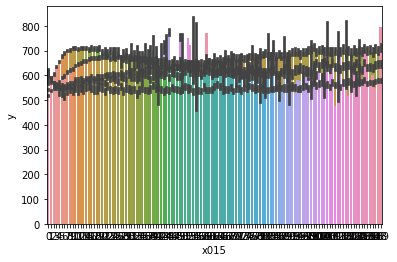

In [87]:
cols = ['x002', 'x004', 'x005', 'x014', 'x015']
for a in cols:
  sns.barplot(data=prep_data, x=a, y='y')

In [88]:
coL=list(prep_data.columns)

In [89]:
type(coL)

list

In [90]:
%matplotlib inline
train_test_b4_split_data=prep_data.copy


In [100]:
train_final = prep_data[prep_data.source=="train"]
test_final = prep_data[prep_data.source=="test"]

In [101]:
train_final = train_final.drop(columns='source',axis=1)
test_final = test_final.drop(columns='source',axis=1)
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
train_final = clean_dataset(train_final)
train_final.shape


(10310, 62)

In [102]:
train_final.columns

Index(['x002', 'x004', 'x005', 'x014', 'x015', 'x017', 'x018', 'x019', 'x020',
       'x022', 'x023', 'x025', 'x027', 'x028', 'x030', 'x036', 'x041', 'x043',
       'x046', 'x047', 'x056', 'x057', 'x058', 'x059', 'x063', 'x064', 'x065',
       'x099', 'x148', 'x162', 'x168', 'x172', 'x173', 'x224', 'x225', 'x226',
       'x227', 'x228', 'x229', 'x235', 'x236', 'x237', 'x239', 'x244', 'x245',
       'x246', 'x247', 'x248', 'x249', 'x250', 'x251', 'x253', 'x260', 'x261',
       'x262', 'x276', 'x277', 'x278', 'x287', 'x293', 'x297', 'y'],
      dtype='object')

In [103]:
X = train_final.drop("y", axis=1)
Y = train_final["y"]
print(X.shape)
print(Y.shape)

(10310, 61)
(10310,)


In [104]:
seed      = 42
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8248, 61)
(2062, 61)
(8248,)
(2062,)


In [105]:
regr = LinearRegression()
regr.fit(X_train,Y_train)
print(regr.score(X_test,Y_test))

0.7782320988706866
